# Machine Learning - ElasticNet, Lasso, Ridge, & Linear Regression

# Load Packages

In [2]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

In [3]:
# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

In [20]:
# import base packages into the namespace for this program
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from math import sqrt

import sklearn.linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score   
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Read in Data & Exploratory Data Analysis

In [9]:
# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv(
    '/Users/derekhigham/Documents/school/MSDS 422/Module 3/jump-start-boston-housing-v001/boston.csv', 
    sep=',')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [21]:
# overrides the default rcParams for plotting
def init_plotting():
    plt.style.use(style='ggplot')
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.color']= 'black'
    plt.rcParams['ytick.color']= 'black'
init_plotting()
# avoid empty plot, always good to close plot
plt.close()

In [22]:
# correlation heat map setup for seaborn
def corr_plot(df_corr):
    corr = df_corr.corr()
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    sns.heatmap(boston_input.corr(), mask=top, cmap='coolwarm', annot=True, fmt=".2f")
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 0)
    plt.show()

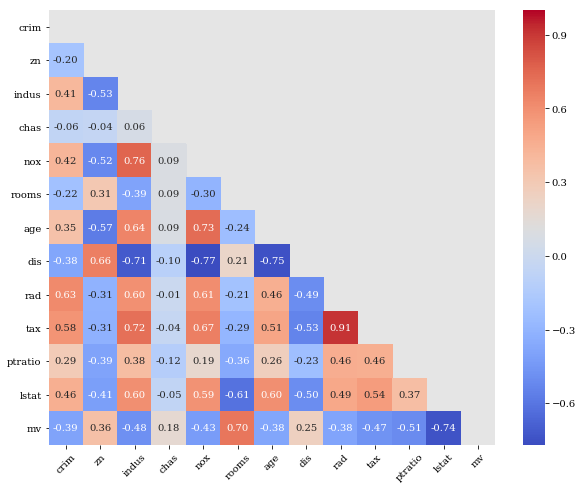

In [29]:
# plot the numerical correlations
boston_input_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'mv']
corr_plot(boston_input)

In [27]:
# creates histogram plots to examine distributions
# saves image to pdf
def hist_density_plots(data, dataname, title, features):
    d = data
    f = features
    g = pd.melt(d, value_vars = f)
    gm = sns.FacetGrid(g, col='variable', col_wrap = 4, sharex = False, sharey = False)
    gm = gm.map(sns.distplot, 'value')
    plt.title(title)
    plt.title(title)
    plt.savefig('/Users/derekhigham/Documents/school/MSDS 422/Module 3/jump-start-boston-housing-v001/Hist-Density-{}.pdf'.format(dataname), 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)
    plt.show()
    plt.close()

In [24]:
# creates/shows seaborn boxplot
# saves image to pdf 
def box_plot(data, dataname, title, features):
    d = data
    f = features
    g = pd.melt(d, value_vars = f)
    gm = sns.FacetGrid(g, col='variable', col_wrap = 4, sharex = False, sharey = False)
    gm = gm.map(sns.boxplot, 'value')
    plt.title('Box Plot-{}-')
    plt.title(title)
    plt.savefig('/Users/derekhigham/Documents/school/MSDS 422/Module 3/jump-start-boston-housing-v001/Boxplot-{}.pdf'.format(dataname), 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)
    plt.show()
    plt.close()

In [25]:
# creates and shows seaborn pairplot (scatter matrix)
# saves image to pdf    
def scatter_matrix(data, dataname, title, features):
    d = data
    sns.pairplot(d)
    plt.title(title)

    plt.savefig('/Users/derekhigham/Documents/school/MSDS 422/Module 3/jump-start-boston-housing-v001/Scatte-Matrix-{}.pdf'.format(dataname), 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)
    plt.show()
    plt.close()

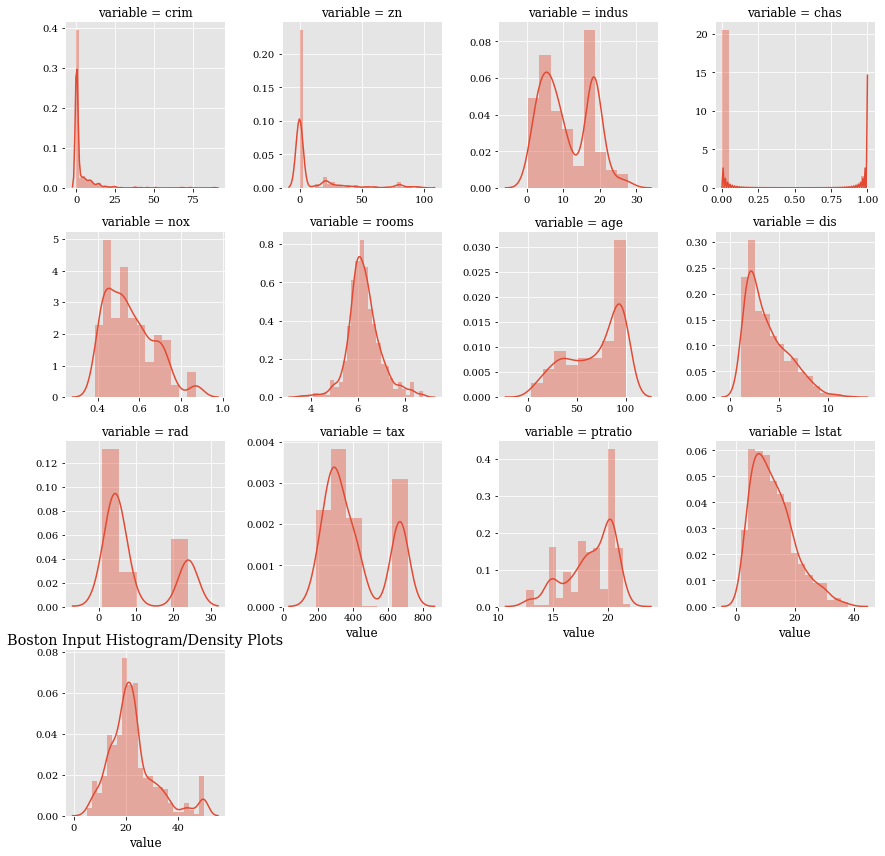

In [30]:
# histogram/density plots for boston_input 
hist_density_plots(boston_input, 'Boston-Input', 'Boston Input Histogram/Density Plots',
                   boston_input_features)

/Users/derekhigham/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


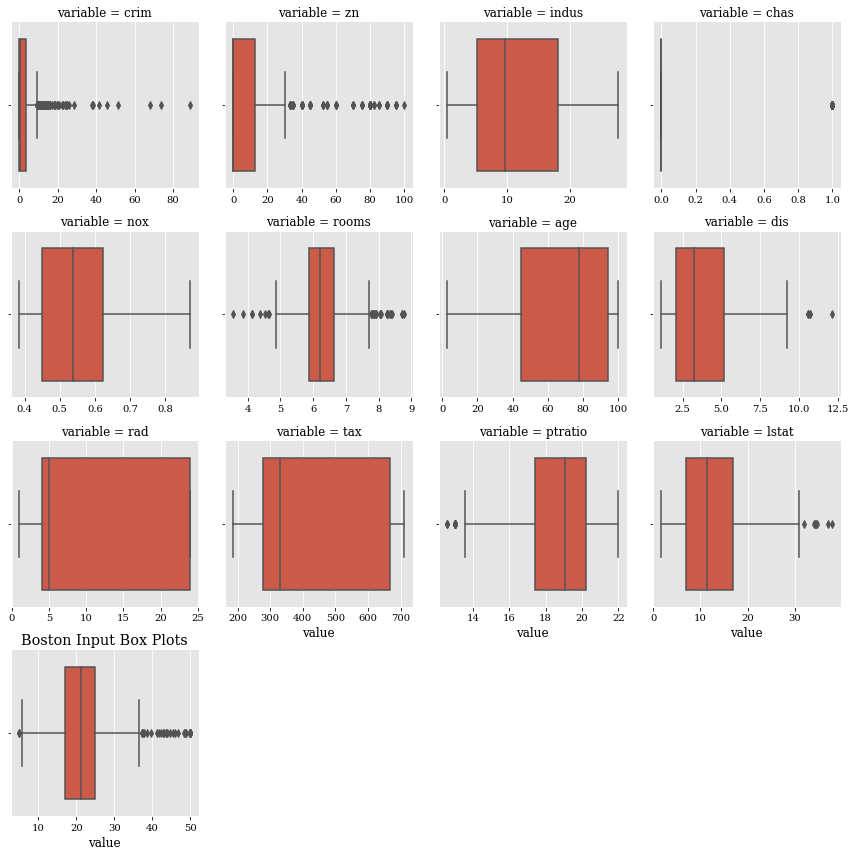

In [31]:
# box plots for boston_input 
box_plot(boston_input, 'Boston-Input', 'Boston Input Box Plots', 
         boston_input_features)

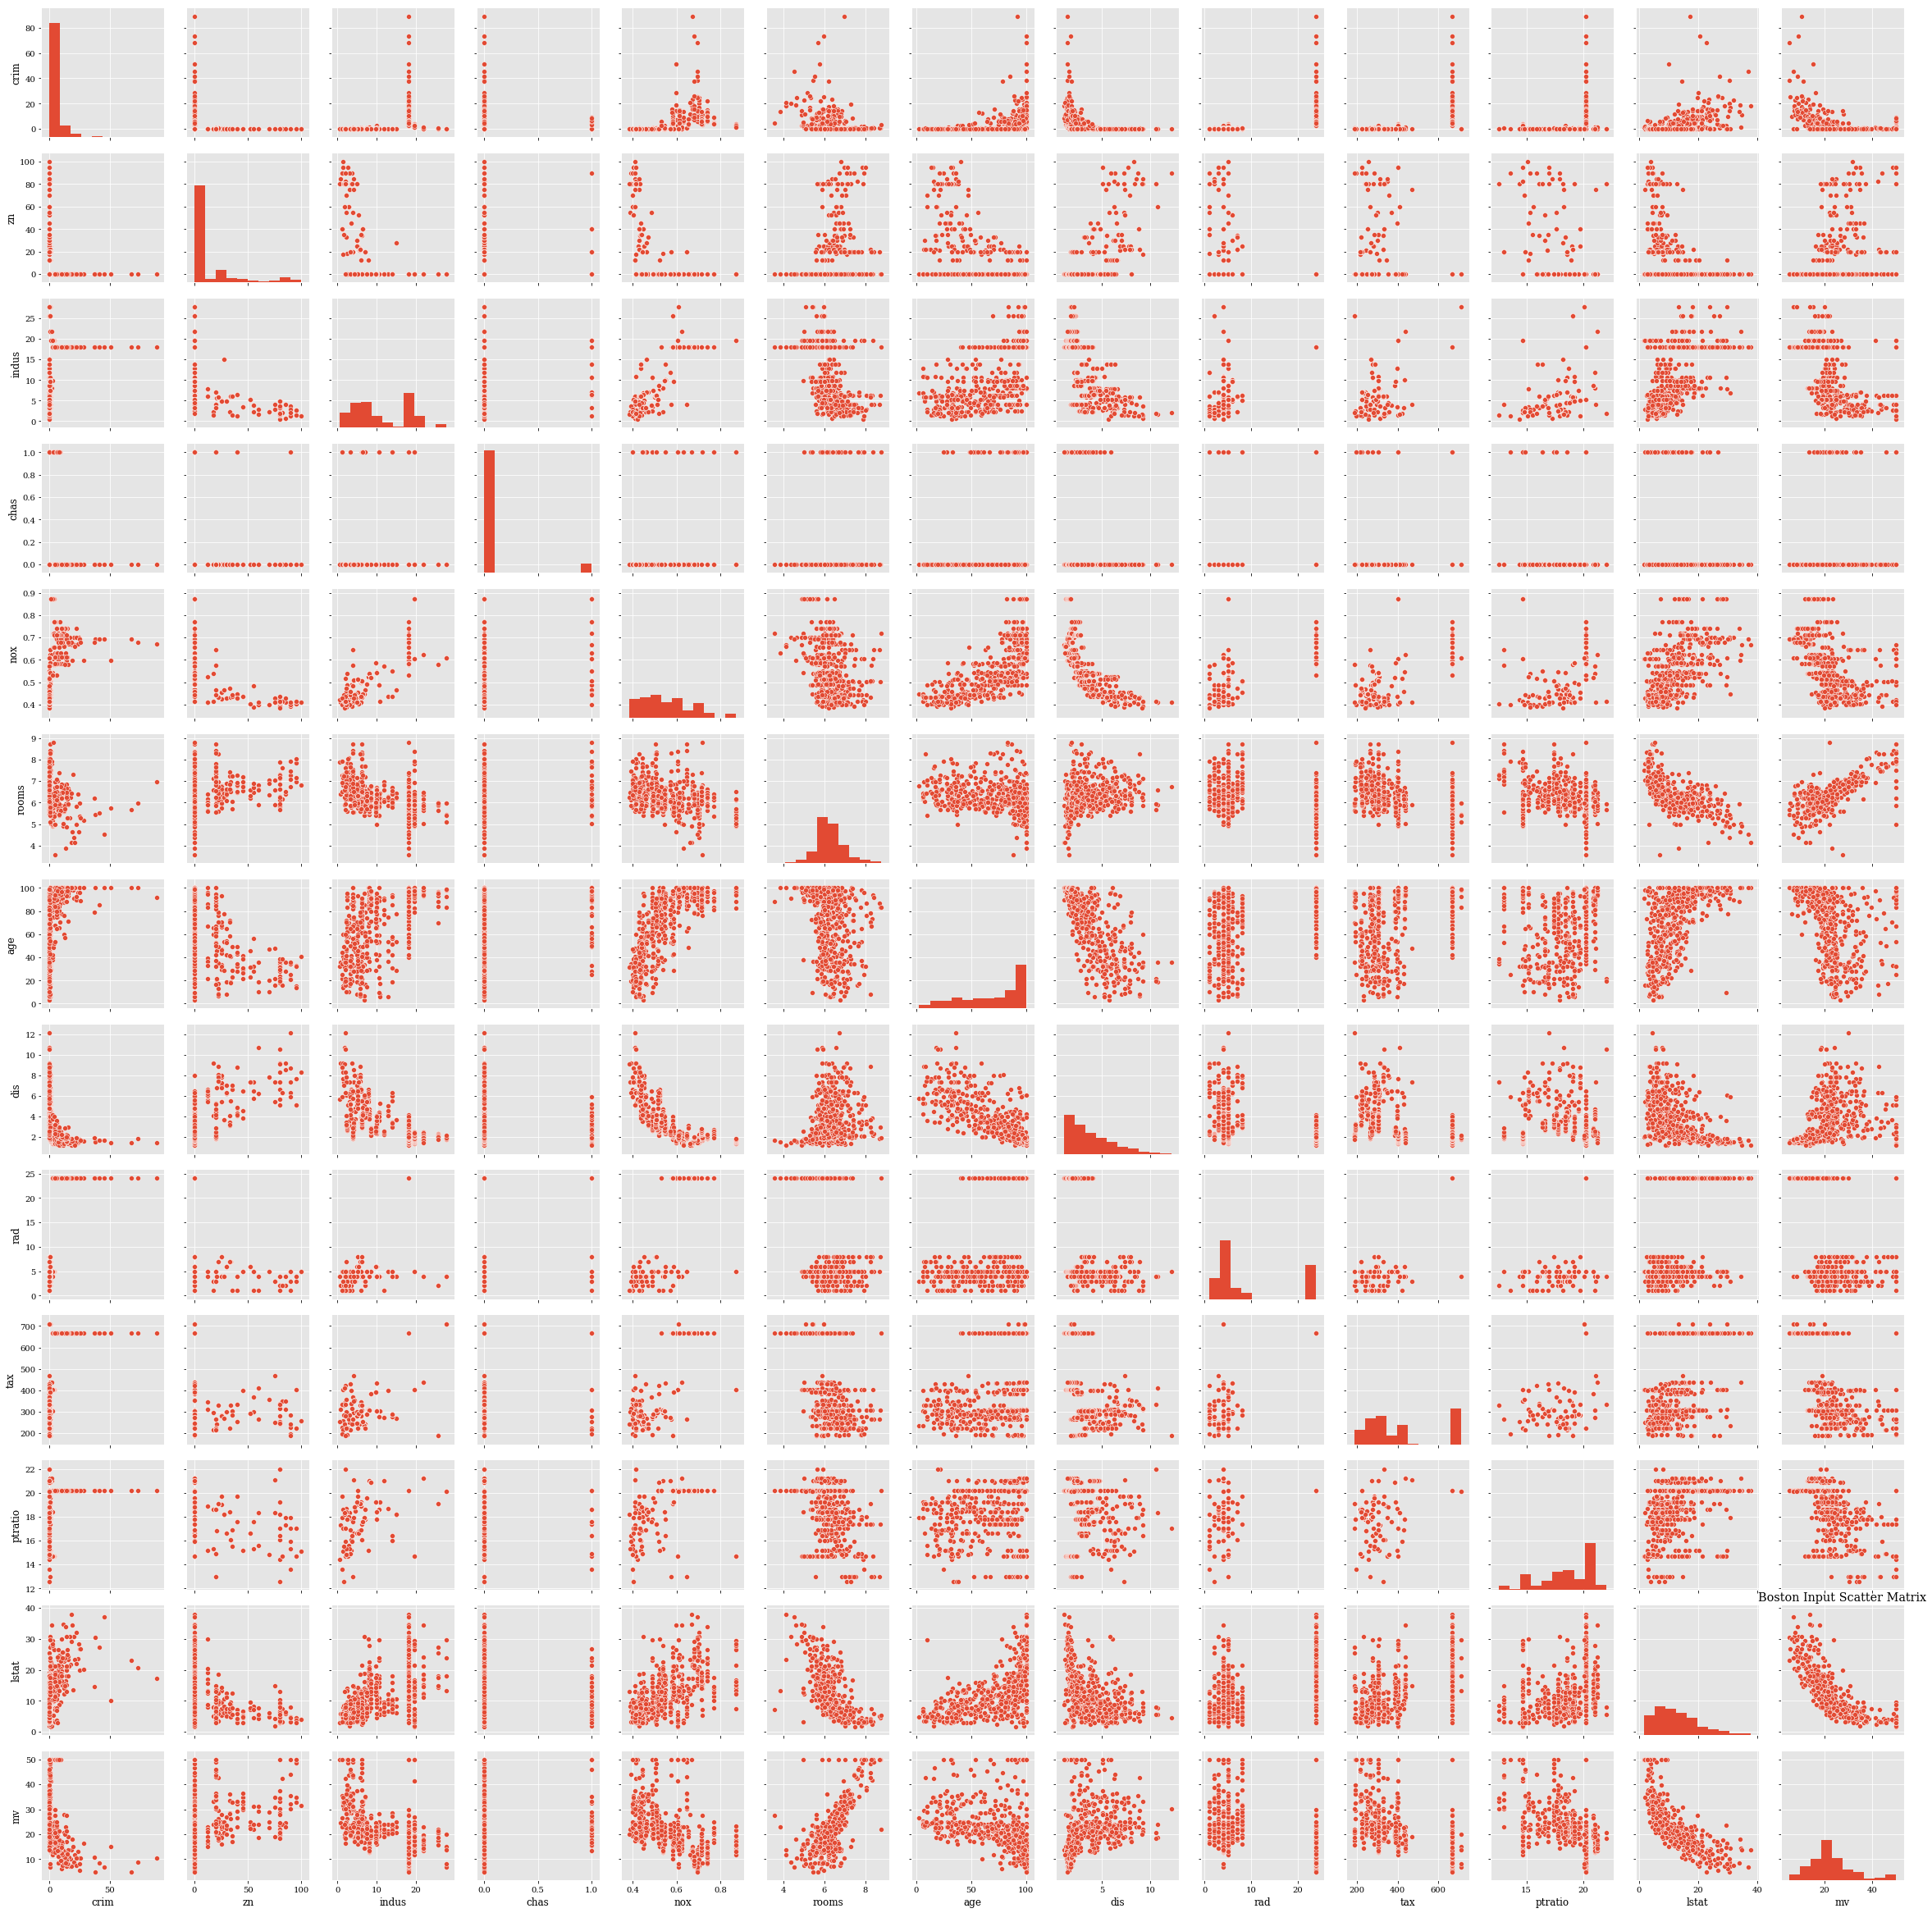

In [32]:
# scatter matrix plots for boston_input 
scatter_matrix(boston_input, 'Boston-Input', 'Boston Input Scatter Matrix',
               boston_input_features)

# Data Transformation

In [10]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [11]:
# descriptive statistics of boston DataFrame
print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.

In [14]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


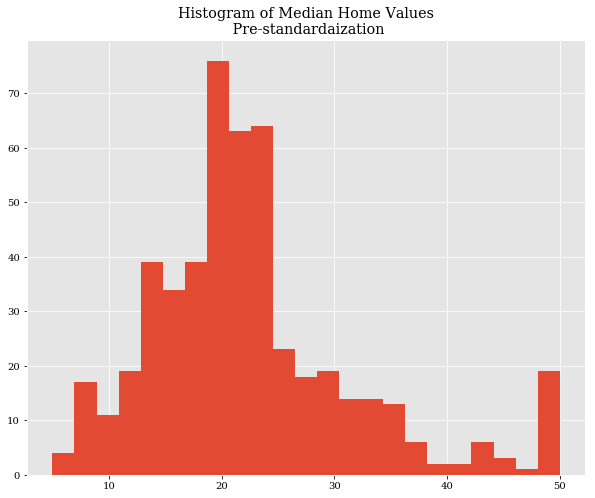

In [35]:
# Check out distribution of Median Home Value
plt.hist(prelim_model_data[:,0], bins = 'auto')
plt.title('Histogram of Median Home Values\n Pre-standardaization')
plt.savefig('/Users/derekhigham/Documents/school/MSDS 422/Module 3/jump-start-boston-housing-v001/Hist-Median-Home-Values.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()

In [15]:
# standard scores for the columns... along axis 0
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

StandardScaler(copy=True, with_mean=True, with_std=True)
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]


In [17]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


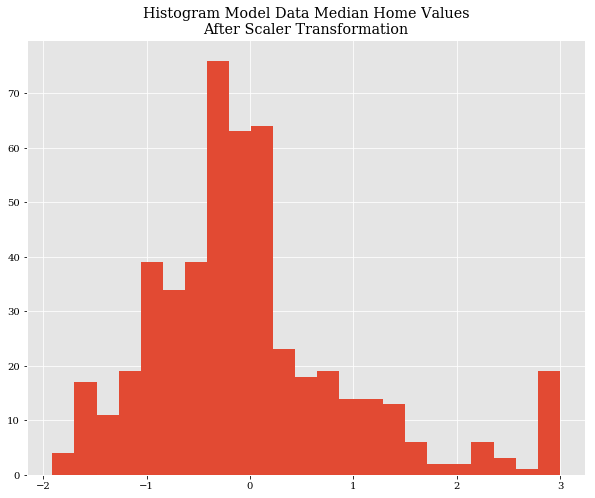

In [36]:
# Check out distribution of Median Home Value after Standardization
plt.hist(model_data[:,0], bins = 'auto')
plt.title('Histogram Model Data Median Home Values\nAfter Scaler Transformation')
plt.savefig('/Users/derekhigham/Documents/school/MSDS 422/Module 3/jump-start-boston-housing-v001/Hist-Model-Data-Median-Home-Values-After-Scaler-Transformation.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()

# Regression Model Building

In [37]:
# specify the set of regression models being evaluated
# set normalize=False because we have standardized
# the model input data outside of the modeling method calls

# list of regression model names
names = ['ElasticNet_Regression', 'Lasso_Regression','Linear_Regression', 
         'Ridge_Regression'] 

# list of regressors
regressors = [ElasticNet(alpha = 0.1, l1_ratio = 0.5, 
                          max_iter=10000, tol=0.01, 
                          fit_intercept = SET_FIT_INTERCEPT, 
                          normalize = False, 
                          random_state = RANDOM_SEED),
              Lasso(alpha = 0.1, max_iter=10000, tol=0.01, 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     random_state = RANDOM_SEED),
              LinearRegression(fit_intercept = SET_FIT_INTERCEPT),
              Ridge(alpha = 1, solver = 'cholesky', 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     normalize = False, 
                     random_state = RANDOM_SEED)]

In [38]:
# ten-fold cross-validation employed here
N_FOLDS = 10

# set up numpy array for storing results
crossvalidation_results = np.zeros((N_FOLDS, len(names)))

# kf, object,  model selection kfold split set up
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

#--check the splitting process by looking at fold observation counts--
# fold count initialized to zero
index_for_fold = 0

In [39]:
# check the splitting process by looking at fold observation counts
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold)
#   the structure of modeling data for this study has the
#   response variable coming first and explanatory variables later          
#   so 1:model_data.shape[1] slices for explanatory variables
#   and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    # variable index_for_method, initialize to zero
    index_for_method = 0 
    for name, reg_model in zip(names, regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
        print('Fitted regression intercept:', reg_model.intercept_)
        print('Fitted regression coefficients:', reg_model.coef_)
 
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result,
              '\n--------------------------------------------------------\n')
        crossvalidation_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
    
    index_for_fold += 1


Fold index: 0

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=1, selection='cyclic', tol=0.01, warm_start=False)
Fitted regression intercept: 0.010146832850782737
Fitted regression coefficients: [-0.03151316  0.         -0.          0.0506493  -0.02703611  0.31098112
 -0.         -0.04531021 -0.         -0.0373414  -0.1678939  -0.39168051]
Coefficient of determination (R-squared): 0.7753975899539927
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.301190471955

Fitted regression intercept: -0.043045602135584476
Fitted regression coefficients: [-0.02209289  0.05558445  0.04293061  0.0309466  -0.19138677  0.53206806
 -0.0953144  -0.26432142  0.08561609 -0.22989864 -0.19873962 -0.1903533 ]
Coefficient of determination (R-squared): -0.014566207830290168
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
Root mean-squared error: 1.3408272247731303 
--------------------------------------------------------


Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='cholesky', tol=0.001)
Fitted regression intercept: -0.04296490778827658
Fitted regression coefficients: [-0.02176414  0.05486715  0.04060319  0.03132774 -0.189139    0.53071908
 -0.09455978 -0.26215022  0.08162396 -0.22525922 -0.19825344 -0.19128071]
Coefficient of determination (R-squared): -0.012805869231095057
{'alpha': 1, 'copy_X': True, 'fit_

In [40]:
# crossvalidation_results_df, pandas DataFrame, store cross validation results
crossvalidation_results_df = pd.DataFrame(crossvalidation_results)

In [42]:
# crossvalidation_results_df, gets column names from DataFrame and stores them to variable names
crossvalidation_results_df.columns = names
with open("/Users/derekhigham/Documents/school/MSDS 422/Module 3/jump-start-boston-housing-v001/cv-results.txt", "w") as text_file:
    text_file.write('\nCross validation results:\n'+
                    str(crossvalidation_results_df)+
                    '\nCross validation results column names:\n'+
                    str(names))

In [43]:
pd.set_option('precision', 5)
print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod Root mean-squared error', sep = '') 
print(crossvalidation_results_df.mean())   
with open("/Users/derekhigham/Documents/school/MSDS 422/Module 3/jump-start-boston-housing-v001/cv-results-df-mean.txt", "w") as text_file:
    text_file.write('\nAverage results from '+ str(N_FOLDS) + '-fold cross-validation\n'+
                    'in standardized units (mean 0, standard deviation 1)\n'+
                     '\nMethod Root mean-squared error:\n'+ 
                     str(crossvalidation_results_df.mean()))


----------------------------------------------
Average results from 10-fold cross-validation
in standardized units (mean 0, standard deviation 1)

Method Root mean-squared error
ElasticNet_Regression    0.56808
Lasso_Regression         0.58738
Linear_Regression        0.56194
Ridge_Regression         0.56051
dtype: float64
